In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
directory = r'C:/Users/dhani/Downloads/Cataract Dataset/dataset/Data'
categories = ['cataract_Preprocess','normal_Preprocess']

In [3]:
data =[]
for cat in categories:
    folder_path = os.path.join(directory,cat)
    label = categories.index(cat)
    print(label)
    for img in os.listdir(folder_path):
        img = os.path.join(folder_path,img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(224,224))
        data.append([img_arr,label])
         

0
1


In [4]:
data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 1, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [1, 1, 1]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [1, 1, 1],
         [0, 0, 0]]], dtype=uint8),
 0]

In [5]:
random.shuffle(data)

In [6]:
x=[]
y=[]

for features,label in data:
    x.append(features)
    y.append(label)

In [7]:
x  = np.array(x)
y = np.array(y)

In [8]:
x

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [9]:
 x=x/255

In [49]:
x[0].shape

(224, 224, 3)

In [11]:
x.shape

(3000, 224, 224, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu',input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [17]:
x.shape

(3000, 224, 224, 3)

In [18]:
train_size =int(len(x)*0.8)
test_size = int(len(y)*0.2)
x_train = x[0:train_size]
y_train = y[0:train_size]
x_test=x[train_size:]
y_test=y[train_size:]


In [19]:
hist=model.fit(x_train,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
68/68 [==============================] - 104s 1s/step - loss: 0.5092 - accuracy: 0.7509 - val_loss: 0.3758 - val_accuracy: 0.8333
Epoch 2/100
68/68 [==============================] - 94s 1s/step - loss: 0.3706 - accuracy: 0.8241 - val_loss: 0.3937 - val_accuracy: 0.8333
Epoch 3/100
68/68 [==============================] - 92s 1s/step - loss: 0.3777 - accuracy: 0.8269 - val_loss: 0.3027 - val_accuracy: 0.8333
Epoch 4/100
68/68 [==============================] - 94s 1s/step - loss: 0.3787 - accuracy: 0.8375 - val_loss: 0.3930 - val_accuracy: 0.8333
Epoch 5/100
68/68 [==============================] - 91s 1s/step - loss: 0.3841 - accuracy: 0.8236 - val_loss: 0.3593 - val_accuracy: 0.8333
Epoch 6/100
68/68 [==============================] - 91s 1s/step - loss: 0.3683 - accuracy: 0.8227 - val_loss: 0.3255 - val_accuracy: 0.8250
Epoch 7/100
68/68 [==============================] - 92s 1s/step - loss: 0.3564 - accuracy: 0.8269 - val_loss: 0.3017 - val_accuracy: 0.8333
Epoch 8/100


In [20]:
x[0].shape

(224, 224, 3)

In [21]:
a = model.predict(x_test)
a

19/19 [==============================] - 6s 273ms/step


array([[1.0000000e+00],
       [5.3340062e-07],
       [9.9998468e-01],
       [9.9910307e-01],
       [9.9723577e-01],
       [6.0445881e-03],
       [1.9342072e-32],
       [1.0000000e+00],
       [1.4790611e-29],
       [1.0000000e+00],
       [0.0000000e+00],
       [9.9994105e-01],
       [9.9910480e-01],
       [9.4587284e-01],
       [9.9894619e-01],
       [9.9999470e-01],
       [0.0000000e+00],
       [9.9998838e-01],
       [9.9999261e-01],
       [9.9999863e-01],
       [1.0000000e+00],
       [9.4849634e-01],
       [9.9703664e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.8640814e-03],
       [2.9463433e-18],
       [9.9972725e-01],
       [0.0000000e+00],
       [9.7231107e-30],
       [0.0000000e+00],
       [1.0000000e+00],
       [3.0468303e-01],
       [9.9999243e-01],
       [9.9594718e-01],
       [9.7899121e-01],
       [1.7215352e-03],
       [1.1589597e-02],
       [0.0000000e+00],
       [9.9999988e-01],
       [0.0000000e+00],
       [0.000000

In [22]:
a.shape

(600, 1)

In [23]:
y_predicted=[]

In [25]:
for i in range(0,len(a)):
        if(a[i]>0.5):
            y_predicted.append(1)
        else:
            y_predicted.append(0)

In [26]:
y_predicted

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [27]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score
from sklearn.metrics import matthews_corrcoef,precision_score
cm=confusion_matrix(y_predicted,y_test)
cm

array([[263,   9],
       [ 16, 312]], dtype=int64)

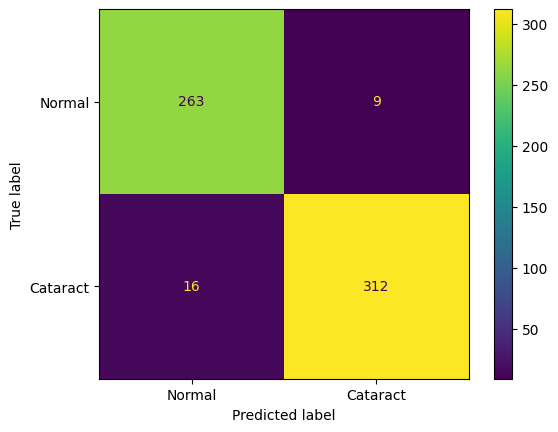

In [28]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Normal','Cataract'])

cm_display.plot()
plt.show()

### Accuracy = (True Postive + True Negative) / Total

In [29]:
accuracy_score(y_predicted,y_test)

0.9583333333333334

### Precision = True Positive /(True Positive + False Positive)

In [30]:
precision_score(y_predicted,y_test)

0.9719626168224299

### F1_Score = 2*(Precision*Recall)/(Precision+Recall

In [31]:
f1_score(y_predicted,y_test)

0.9614791987673342

### Matthews_corrcoef

In [32]:
matthews_corrcoef(y_predicted,y_test)

0.9163714251156384

### Recall = True Postive /(True Postive + False Negative)

In [33]:
recall_score(y_predicted,y_test)

0.9512195121951219

### Specificity = True Negative / (True Negative + False Postive)

In [34]:
specificity = cm[1][1]/(cm[1][1]+cm[0][1])
specificity

0.9719626168224299

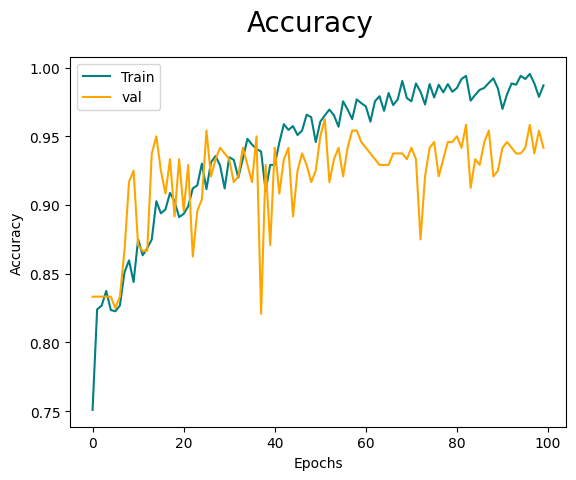

In [35]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.plot(hist.history['accuracy'],color="teal",label="Train")
plt.plot(hist.history['val_accuracy'],color='orange',label='val')
fig.suptitle('Accuracy',fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

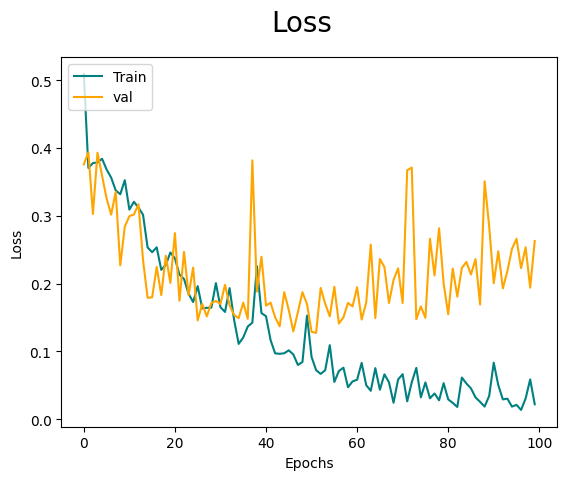

In [36]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.plot(hist.history['loss'],color="teal",label="Train")
plt.plot(hist.history['val_loss'],color='orange',label='val')
fig.suptitle('Loss',fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [37]:
from sklearn import metrics

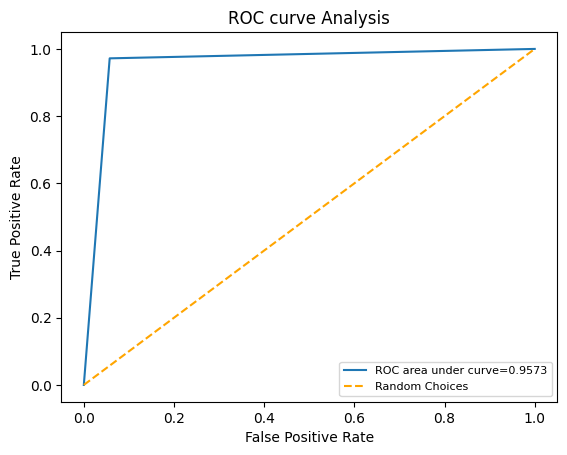

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_predicted)
auc = metrics.roc_auc_score(y_test, y_predicted)
plt.plot(fpr,tpr,label = "ROC area under curve={:.4f}".format(auc))
plt.plot([0,1],color='orange',linestyle='--',label = "Random Choices")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC curve Analysis")
plt.legend(loc='best',fontsize=8)
plt.show()

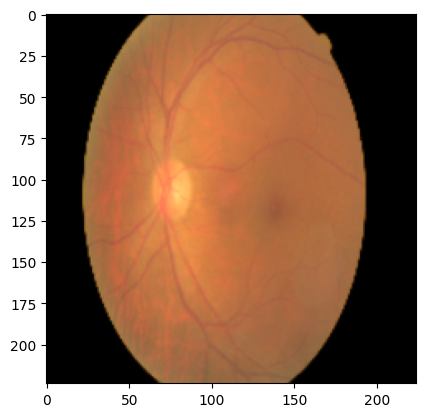

In [64]:
img = cv2.imread('C:/Users/dhani/Downloads/Cataract Dataset/dataset/Data/normal_Preprocess/p_200_zoom.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
img_resize = cv2.resize(img,(224,224))
img_resize.shape

(224, 224, 3)

In [72]:
img_nor= image_normalized=cv2.normalize(img_resize, None, 0, 1.0,cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [67]:
img_batch = np.expand_dims(img_nor, axis=0)

In [70]:
y_pred = model.predict(img_batch)

1/1 [==============================] - 0s 30ms/step


In [73]:
if y_pred > 0.5:
    print('The given image is Non-Cataract')
else:
    print('The given image  is Cataract')

The given image is Non-Cataract
